In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score


#  Loading the csv File and creating the dataset.

In [2]:
Housing_dataset = pd.read_csv("/Users/z003zyj/Downloads/train.csv", encoding= "ISO-8859-1");

# Performing Basic Checks on the dataset.

In [3]:
Housing_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
Housing_dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
Housing_dataset.shape

(1460, 81)

In [6]:
Housing_dataset.describe([.25,.50,.75,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
Housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# Data Cleaning ..

In [8]:
#Finding the featursa which are having more than 40% records as null..

(Housing_dataset.isnull().sum(axis=0)/(Housing_dataset.shape[0])*100).sort_values(ascending=False)[(Housing_dataset.isnull().sum(axis=0)/(Housing_dataset.shape[0])*100).sort_values(ascending=False)>40]

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
FireplaceQu    47.260274
dtype: float64

In [9]:
#Considering 40% as my threshold and dropping the column having more than the thresold..

Housing_dataset = Housing_dataset.drop(columns=["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"])

In [10]:
Housing_dataset.shape

(1460, 76)

In [11]:
#Verifiing the Data is having how much percentage null values after removing the above features.. 

(Housing_dataset.isnull().sum(axis=0)/Housing_dataset.shape[0]*100).sort_values(ascending= False)

LotFrontage      17.739726
GarageFinish      5.547945
GarageType        5.547945
GarageCond        5.547945
GarageQual        5.547945
GarageYrBlt       5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrType        0.547945
MasVnrArea        0.547945
Electrical        0.068493
RoofStyle         0.000000
RoofMatl          0.000000
SalePrice         0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
YearBuilt         0.000000
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
YearRemodAdd      0.000000
BldgType          0.000000
OverallCond       0.000000
OverallQual       0.000000
HouseStyle        0.000000
Condition2        0.000000
Condition1        0.000000
                   ...    
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
3SsnPorch         0.000000
BsmtUnfSF         0.000000
S

In [12]:
#Finding the current datetime ..

present = datetime.datetime.now()

In [13]:
# Deriving the feature YearBuilt_Age,YearRemodAdd_Age, GarageYrBlt_Age,YrSold_Age from YearBuilt,YearRemodAdd,
# GarageYrBlt ,YrSold and calculating the Age of the property based on current year (2020)...

Housing_dataset['YearBuilt_Age']= present.year - Housing_dataset['YearBuilt']
Housing_dataset['YearRemodAdd_Age']= present.year - Housing_dataset['YearRemodAdd']
Housing_dataset['GarageYrBlt_Age']= present.year - Housing_dataset['GarageYrBlt']
Housing_dataset['YrSold_Age']= present.year-Housing_dataset['YrSold']

In [14]:
Housing_dataset.shape

(1460, 80)

In [15]:
Housing_dataset.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,2,2008,WD,Normal,208500,17,17,17.0,12
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,5,2007,WD,Normal,181500,44,44,44.0,13
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,9,2008,WD,Normal,223500,19,18,19.0,12
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,2,2006,WD,Abnorml,140000,105,50,22.0,14
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,12,2008,WD,Normal,250000,20,20,20.0,12
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,700,10,2009,WD,Normal,143000,27,25,27.0,11
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,8,2007,WD,Normal,307000,16,15,16.0,13
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,...,350,11,2009,WD,Normal,200000,47,47,47.0,11
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,0,4,2008,WD,Abnorml,129900,89,70,89.0,12
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,1,2008,WD,Normal,118000,81,70,81.0,12


In [16]:
# After Deriving the Age from Features droping the year Columns..

Housing_dataset= Housing_dataset.drop(columns=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'])

In [17]:
Housing_dataset.shape

(1460, 76)

In [18]:
Housing_dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'Scree

In [19]:
# Droping the feature ID as it is not relevent to find the target variable (sales Price).

Housing_dataset= Housing_dataset.drop(columns=['Id'])

In [20]:
Housing_dataset.shape

(1460, 75)

In [21]:
#Findind the number of Unique Values for each Features...

Housing_dataset.nunique().sort_values(ascending = True)

CentralAir             2
Street                 2
Utilities              2
PavedDrive             3
BsmtHalfBath           3
LandSlope              3
GarageFinish           3
HalfBath               3
BsmtCond               4
MasVnrType             4
BsmtExposure           4
BsmtFullBath           4
FullBath               4
KitchenQual            4
ExterQual              4
Fireplaces             4
LandContour            4
LotShape               4
KitchenAbvGr           4
BsmtQual               4
GarageCars             5
Electrical             5
HeatingQC              5
GarageQual             5
GarageCond             5
YrSold_Age             5
ExterCond              5
BldgType               5
LotConfig              5
MSZoning               5
                    ... 
OverallCond            9
OverallQual           10
MoSold                12
TotRmsAbvGrd          12
MSSubClass            15
Exterior1st           15
Exterior2nd           16
3SsnPorch             20
MiscVal               21


In [22]:
# Checking the data variences for Utilities features. As almost whole data contains Utilities as AllPub , 
# So thinking will not impact this feature if we will drop while buiding the model as feature data will not varying. 

Housing_dataset['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [23]:
# Checking the data variences for Street features. As almost whole data contains Street as Pave , 
# So thinking will not impact this feature if we will drop while buiding the model as feature data will not varying.

Housing_dataset['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [24]:
#Droping Street,Utilities for the above mentioned Reason.

Housing_dataset= Housing_dataset.drop(columns=['Utilities','Street'])

In [25]:
Housing_dataset.shape

(1460, 73)

# Imputing missing value..

In [26]:
#Checking which all the features is having missing values..

Housing_dataset.columns [Housing_dataset.isna().any()]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'GarageYrBlt_Age'],
      dtype='object')

In [27]:
# For LotFrontage Feature replacing missing values with mean() of LotFrontage...
Housing_dataset['LotFrontage'].value_counts()
Housing_dataset['LotFrontage'].fillna(Housing_dataset.LotFrontage.mean(),inplace=True)

In [28]:
# For MasVnrType Feature replacing missing values with 'None' as 'None' has present for maximum dataset...
Housing_dataset['MasVnrType'].value_counts()
Housing_dataset['MasVnrType'].fillna('None',inplace=True)

In [29]:
# For MasVnrArea Feature replacing missing values with mean() of MasVnrArea...
Housing_dataset['MasVnrArea'].value_counts()
Housing_dataset['MasVnrArea'].fillna(Housing_dataset.MasVnrArea.mean(),inplace=True)

In [30]:
# For BsmtQual Feature replacing missing values with 'TA' as 'TA' has present for maximum dataset...
Housing_dataset['BsmtQual'].value_counts()
Housing_dataset['BsmtQual'].fillna('TA',inplace=True)

In [31]:
# For BsmtCond Feature replacing missing values with 'TA' as 'TA' has present for maximum dataset...
Housing_dataset['BsmtCond'].value_counts()
Housing_dataset['BsmtCond'].fillna('TA',inplace=True)

In [32]:
# For BsmtExposure Feature replacing missing values with 'No' as 'No' has present for maximum dataset...
Housing_dataset['BsmtExposure'].value_counts()
Housing_dataset['BsmtExposure'].fillna('No',inplace=True)

In [33]:
# For BsmtFinType2 Feature replacing missing values with 'Unf' as 'Unf' has present for maximum dataset...
Housing_dataset['BsmtFinType1'].value_counts()
Housing_dataset['BsmtFinType1'].fillna('Unf',inplace=True)

In [34]:
# For BsmtFinType1 Feature replacing missing values with 'Unf' as 'Unf' has present for maximum dataset...
Housing_dataset['BsmtFinType2'].value_counts()
Housing_dataset['BsmtFinType2'].fillna('Unf',inplace=True)

In [35]:
# For Electrical Feature replacing missing values with 'SBrkr' as 'SBrkr' has present for maximum dataset...
Housing_dataset['Electrical'].value_counts()
Housing_dataset['Electrical'].fillna('SBrkr',inplace=True)

In [36]:
# For GarageType Feature replacing missing values with 'Attchd' as 'Attchd' has present for maximum dataset...
Housing_dataset['GarageType'].value_counts()
Housing_dataset['GarageType'].fillna('Attchd',inplace=True)

In [37]:
# For GarageFinish Feature replacing missing values with 'Unf' as 'Unf' has present for maximum dataset...
Housing_dataset['GarageFinish'].value_counts()
Housing_dataset['GarageFinish'].fillna('Unf',inplace=True)

In [38]:
# For GarageQual Feature replacing missing values with 'TA' as 'TA' has present for maximum dataset...
Housing_dataset['GarageQual'].value_counts()
Housing_dataset['GarageQual'].fillna('TA',inplace=True)

In [39]:
# For GarageCond Feature replacing missing values with 'TA' as 'TA' has present for maximum dataset...
Housing_dataset['GarageCond'].value_counts()
Housing_dataset['GarageCond'].fillna('TA',inplace=True)

In [40]:
# For GarageYrBlt_Age Feature replacing missing values with -1 as these house donot have garage...
Housing_dataset['GarageYrBlt_Age'].value_counts()
Housing_dataset['GarageYrBlt_Age'].fillna(-1,inplace=True)

In [41]:
Housing_dataset['GarageYrBlt_Age'].value_counts()

-1.0      81
 15.0     65
 14.0     59
 16.0     53
 17.0     50
 13.0     49
 43.0     35
 22.0     31
 21.0     30
 12.0     29
 44.0     29
 20.0     27
 18.0     26
 52.0     26
 70.0     24
 27.0     22
 54.0     21
 11.0     21
 55.0     21
 58.0     21
 62.0     21
 63.0     20
 50.0     20
 24.0     20
 19.0     20
 60.0     19
 42.0     19
 66.0     19
 23.0     19
 26.0     18
          ..
 84.0      5
 104.0     5
 98.0      5
 89.0      4
 74.0      4
 85.0      4
 92.0      4
 75.0      4
 38.0      4
 99.0      3
 97.0      3
 88.0      3
 68.0      3
 110.0     3
 82.0      3
 10.0      3
 96.0      3
 83.0      2
 86.0      2
 105.0     2
 78.0      2
 106.0     2
 102.0     2
 73.0      2
 91.0      2
 93.0      1
 112.0     1
 120.0     1
 114.0     1
 87.0      1
Name: GarageYrBlt_Age, Length: 98, dtype: int64

In [42]:
Housing_dataset.shape

(1460, 73)

# Outlier Treatment..

In [43]:
#Finding List of numeric features in the dataset.
list(Housing_dataset.dtypes[Housing_dataset.dtypes!='object'].index)

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice',
 'YearBuilt_Age',
 'YearRemodAdd_Age',
 'GarageYrBlt_Age',
 'YrSold_Age']

In [44]:
Housing_dataset[list(Housing_dataset.dtypes[Housing_dataset.dtypes!='object'].index)].describe([.25, .5, .75, .90, .95, .99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,...,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890,48.732192,35.134247,39.136301,12.184247
std,42.300571,22.024023,9981.264932,1.382997,1.112799,180.569112,456.098091,161.319273,441.866955,438.705324,...,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883,30.202904,20.645407,25.892617,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,10.000000,10.000000,-1.000000,10.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000,20.000000,16.000000,17.000000,11.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,...,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000,47.000000,26.000000,35.500000,12.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,...,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000,66.000000,53.000000,58.000000,13.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,...,0.000000,0.000000,0.000000,0.000000,10.000000,278000.000000,95.100000,70.000000,72.000000,14.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,...,0.000000,160.000000,0.000000,0.000000,11.000000,326100.000000,104.000000,70.000000,90.000000,14.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,...,168.000000,268.050000,0.000000,700.000000,12.000000,442567.010000,120.820000,70.000000,102.820000,14.000000


335.0


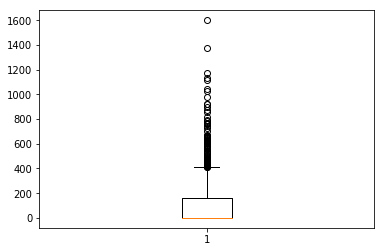

In [45]:
#Outlier Finding for MasVnrArea and ploting boxplot..

plt.boxplot(Housing_dataset['MasVnrArea'])
Q1 = Housing_dataset['MasVnrArea'].quantile(0.1)
Q3 = Housing_dataset['MasVnrArea'].quantile(0.9)
IQR = Q3 - Q1
print(IQR)

9381.70000000001


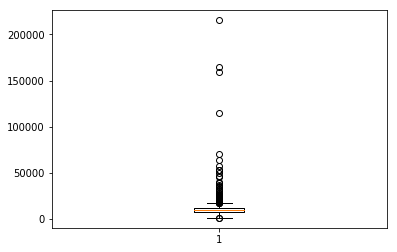

In [46]:
#Outlier Finding for LotArea and ploting boxplot..

plt.boxplot(Housing_dataset['LotArea'])
Q1 = Housing_dataset['LotArea'].quantile(0.1)
Q3 = Housing_dataset['LotArea'].quantile(0.9)
IQR = Q3 - Q1
print(IQR)

1065.5000000000007


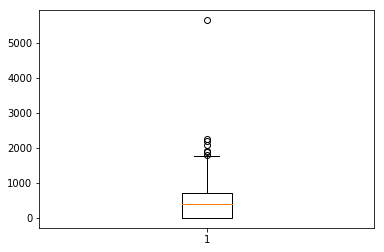

In [47]:
#Outlier Finding for BsmtFinSF1 and ploting boxplot..

plt.boxplot(Housing_dataset['BsmtFinSF1'])
Q1 = Housing_dataset['BsmtFinSF1'].quantile(0.1)
Q3 = Housing_dataset['BsmtFinSF1'].quantile(0.9)
IQR = Q3 - Q1
print(IQR)

965.3000000000003


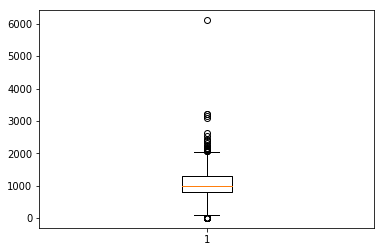

In [48]:
#Outlier Finding for TotalBsmtSF and ploting boxplot..

plt.boxplot(Housing_dataset['TotalBsmtSF'])
Q1 = Housing_dataset['TotalBsmtSF'].quantile(0.1)
Q3 = Housing_dataset['TotalBsmtSF'].quantile(0.9)
IQR = Q3 - Q1
print(IQR)

0.0


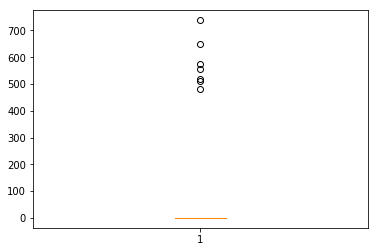

In [49]:
#Outlier Finding for PoolArea and ploting boxplot..

plt.boxplot(Housing_dataset['PoolArea'])
Q1 = Housing_dataset['PoolArea'].quantile(0.1)
Q3 = Housing_dataset['PoolArea'].quantile(0.9)
IQR = Q3 - Q1
print(IQR)

0.0


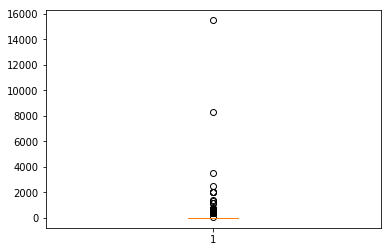

In [50]:
#Outlier Finding for MiscVal and ploting boxplot..

plt.boxplot(Housing_dataset['MiscVal'])
Q1 = Housing_dataset['MiscVal'].quantile(0.1)
Q3 = Housing_dataset['MiscVal'].quantile(0.9)
IQR = Q3 - Q1
print(IQR)

In [51]:
# Below function is for handing the outline / Droping outliers considering lower quantile as .25 
# and upper quantile as .99

num_col = list(Housing_dataset.dtypes[Housing_dataset.dtypes !='object'].index)

def drop_outliers(x):
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    
    return x   

Housing_dataset = drop_outliers(Housing_dataset)

In [52]:
Housing_dataset.shape

(1439, 73)

In [53]:
Housing_dataset[list(Housing_dataset.dtypes[Housing_dataset.dtypes!='object'].index)].describe([.25, .5, .75, .90, .95, .99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age
count,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,...,1439.000000,1439.000000,1439.0,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000
mean,56.820709,69.498672,10012.879083,6.093120,5.570535,103.494428,436.176511,45.569145,569.743572,1051.489229,...,3.106324,14.858235,0.0,17.021543,6.330090,180069.997220,48.680334,35.199444,39.068798,12.184156
std,42.196554,19.780523,5447.945811,1.379747,1.110260,180.009368,432.442487,160.357387,442.539219,416.300011,...,26.358008,54.858125,0.0,108.983769,2.707611,78085.402541,30.302795,20.690375,25.894944,1.328043
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,1.000000,34900.000000,10.000000,10.000000,-1.000000,10.000000
25%,20.000000,60.000000,7500.000000,5.000000,5.000000,0.000000,0.000000,0.000000,226.000000,795.000000,...,0.000000,0.000000,0.0,0.000000,5.000000,129900.000000,19.000000,16.000000,17.000000,11.000000
50%,50.000000,70.049958,9430.000000,6.000000,5.000000,0.000000,378.000000,0.000000,482.000000,990.000000,...,0.000000,0.000000,0.0,0.000000,6.000000,162000.000000,47.000000,26.000000,35.000000,12.000000
75%,70.000000,79.000000,11500.000000,7.000000,6.000000,164.500000,706.000000,0.000000,811.000000,1287.000000,...,0.000000,0.000000,0.0,0.000000,8.000000,213125.000000,66.000000,53.500000,58.000000,13.000000
90%,120.000000,92.000000,14178.200000,8.000000,7.000000,329.000000,1056.600000,105.200000,1232.400000,1600.400000,...,0.000000,0.000000,0.0,0.000000,10.000000,277600.000000,96.000000,70.000000,72.000000,14.000000
95%,160.000000,103.000000,16740.300000,8.000000,8.000000,451.100000,1261.900000,391.500000,1468.200000,1746.600000,...,0.000000,160.000000,0.0,0.000000,11.000000,325661.600000,104.000000,70.000000,90.000000,14.000000
99%,190.000000,130.000000,32590.100000,10.000000,9.000000,781.920000,1567.000000,834.160000,1798.100000,2130.300000,...,165.720000,265.620000,0.0,584.800000,12.000000,439536.400000,121.240000,70.000000,103.240000,14.000000


In [54]:
# As 90% of the data for PoolArea is null and 10% treating as outliers so removing the feature for model building .
Housing_dataset= Housing_dataset.drop(columns=['PoolArea'])

# Plotting heatmap to check the corellation between Feature varables

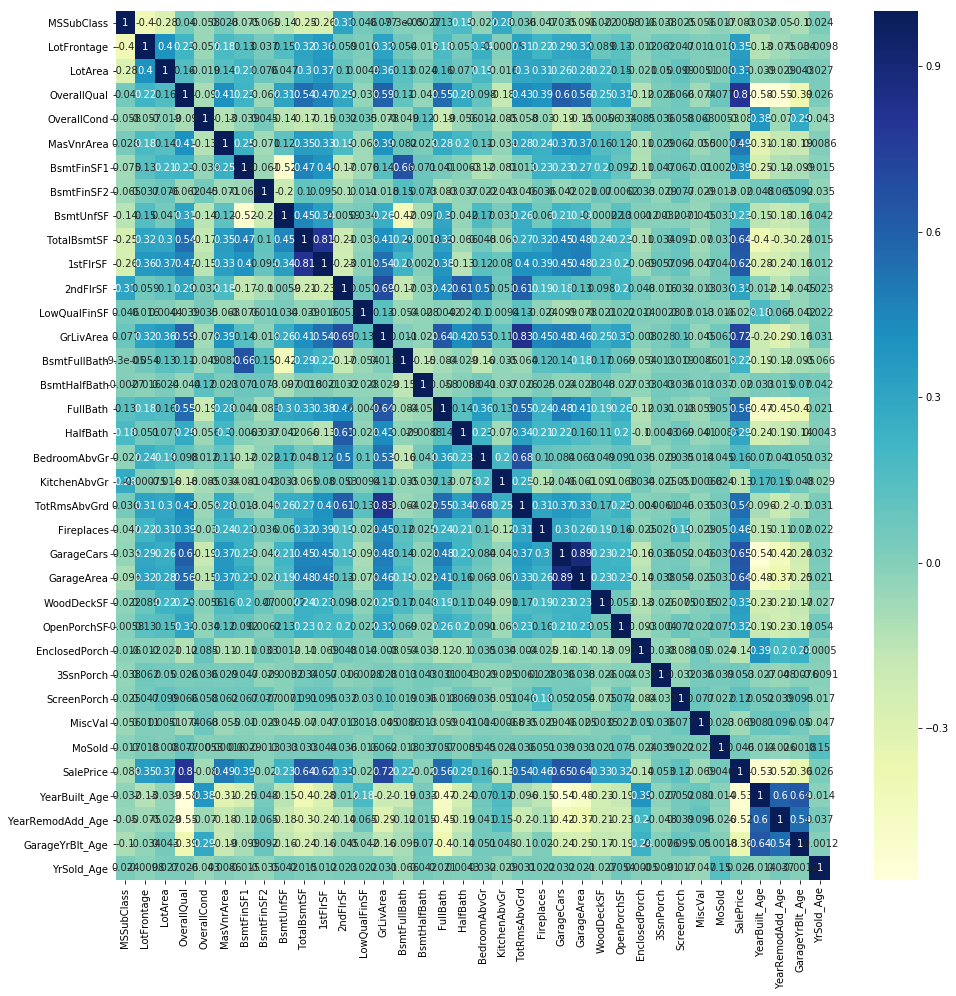

In [55]:
plt.figure(figsize=(16,16))
sns.heatmap(Housing_dataset[list(Housing_dataset.dtypes[Housing_dataset.dtypes!='object'].index)].corr(),annot=True,cmap= 'YlGnBu')
plt.show()

# As Part of Problem Statement 2 Remove top 5 feature coming for Lasso Regression from the input File

In [56]:
Housing_dataset= Housing_dataset.drop(columns=['MSSubClass', 'Condition2','Functional','Neighborhood','BsmtFullBath'])

# Dummy Variable Preparation..

In [57]:
#Fining the list of non numeric features for which we need to create dummy variables. 
Housing_dataset[list(Housing_dataset.dtypes[Housing_dataset.dtypes=='object'].index)].nunique().sort_values(ascending = True)

CentralAir        2
PavedDrive        3
LandSlope         3
GarageFinish      3
BsmtQual          4
LotShape          4
LandContour       4
KitchenQual       4
MasVnrType        4
ExterQual         4
BsmtExposure      4
BsmtCond          4
GarageCond        5
GarageQual        5
Electrical        5
HeatingQC         5
MSZoning          5
ExterCond         5
BldgType          5
LotConfig         5
Foundation        6
BsmtFinType1      6
BsmtFinType2      6
Heating           6
RoofStyle         6
GarageType        6
SaleCondition     6
RoofMatl          7
HouseStyle        8
Condition1        9
SaleType          9
Exterior1st      15
Exterior2nd      16
dtype: int64

In [58]:
# As CentralAir has only Y and N values so Representing with 0 and 1 .
Housing_dataset['CentralAir'] = Housing_dataset['CentralAir'].map({'Y': 1, 'N': 0})

In [59]:
Housing_dataset.shape

(1439, 67)

In [60]:
# As ExterQual,KitchenQual,BsmtQual,BsmtCond,GarageQual,GarageCond,ExterCond,HeatingQC features are having similar 
# set of data so Representing with 'TA': 1, 'Ex': 0,'Gd':3,'Fa':2,'Po':4 as they are ordinal in nature.

Housing_dataset['ExterQual'] = Housing_dataset['ExterQual'].map({'TA': 1,'Gd':3,'Fa':2,'Ex':0})
Housing_dataset['KitchenQual'] = Housing_dataset['KitchenQual'].map({'TA': 1,'Gd':3,'Fa':2,'Ex':0})
Housing_dataset['BsmtQual'] = Housing_dataset['BsmtQual'].map({'TA': 1,'Gd':3,'Fa':2,'Ex':0})
Housing_dataset['BsmtCond'] = Housing_dataset['BsmtCond'].map({'TA': 1,'Gd':3,'Fa':2,'Po':4})
Housing_dataset['GarageQual'] = Housing_dataset['GarageQual'].map({'TA': 1, 'Ex': 0,'Gd':3,'Fa':2,'Po':4})
Housing_dataset['GarageCond'] = Housing_dataset['GarageCond'].map({'TA': 1, 'Ex': 0,'Gd':3,'Fa':2,'Po':4})
Housing_dataset['ExterCond'] = Housing_dataset['ExterCond'].map({'TA': 1, 'Ex': 0,'Gd':3,'Fa':2,'Po':4})
Housing_dataset['HeatingQC'] = Housing_dataset['HeatingQC'].map({'TA': 1, 'Ex': 0,'Gd':3,'Fa':2,'Po':4})

In [61]:
# Creating Dummy Variable for GarageFinish Feature..

Housing_dataset['GarageFinish'].value_counts()
GarageFinish = pd.get_dummies(Housing_dataset['GarageFinish'],drop_first=True, prefix = "GarageFinish_" )
Housing_dataset  = pd.concat([Housing_dataset,GarageFinish],axis=1)
Housing_dataset.head(10)
Housing_dataset = Housing_dataset.drop('GarageFinish',axis=1)

In [62]:
# As PavedDrive has only Gt1 , Mod and Sev values so Representing with 'Gtl': 1, 'Mod': 0,'Sev': 2.

Housing_dataset['LandSlope'].value_counts()
Housing_dataset['LandSlope'] = Housing_dataset['LandSlope'].map({'Gtl': 1, 'Mod': 0,'Sev': 2})

In [63]:
# As PavedDrive has only Y , N and P values so Representing with 0 and 1 and 2.

Housing_dataset['PavedDrive'].value_counts()
Housing_dataset['PavedDrive'] = Housing_dataset['PavedDrive'].map({'Y': 1, 'N': 0,'P': 2})

In [64]:
# As LandContour has only 4 setof  data and among them mmost of the data is having 'Lvl' 
# So represent this way rather creating dummy variable .
Housing_dataset['LandContour'].value_counts()
Housing_dataset['LandContour'] = Housing_dataset['LandContour'].map({'Lvl': 1, 'Bnk': 0,'HLS': 2,'Low':3})

In [65]:
# Creating Dummy Variable for MasVnrType Feature..
MasVnrType = pd.get_dummies(Housing_dataset['MasVnrType'],drop_first=True, prefix = "MasVnrType_" )
Housing_dataset  = pd.concat([Housing_dataset,MasVnrType],axis=1)
Housing_dataset = Housing_dataset.drop('MasVnrType',axis=1)

In [66]:
# Creating Dummy Variable for BsmtExposure Feature..
BsmtExposure = pd.get_dummies(Housing_dataset['BsmtExposure'],drop_first=True, prefix = "BsmtExposure_" )
Housing_dataset  = pd.concat([Housing_dataset,BsmtExposure],axis=1)
Housing_dataset = Housing_dataset.drop('BsmtExposure',axis=1)

In [67]:
# Creating Dummy Variable for LotShape Feature..
LotShape = pd.get_dummies(Housing_dataset['LotShape'],drop_first=True, prefix = "LotShape_" )
Housing_dataset  = pd.concat([Housing_dataset,LotShape],axis=1)
Housing_dataset = Housing_dataset.drop('LotShape',axis=1)

In [68]:
# Creating Dummy Variable for Electrical Feature..
Electrical = pd.get_dummies(Housing_dataset['Electrical'],drop_first=True, prefix = "Electrical_" )
Housing_dataset  = pd.concat([Housing_dataset,Electrical],axis=1)
Housing_dataset = Housing_dataset.drop('Electrical',axis=1)

In [69]:
# Creating Dummy Variable for LotConfig Feature..
LotConfig = pd.get_dummies(Housing_dataset['LotConfig'],drop_first=True, prefix = "LotConfig_" )
Housing_dataset  = pd.concat([Housing_dataset,LotConfig],axis=1)
Housing_dataset = Housing_dataset.drop('LotConfig',axis=1)

In [70]:
# Creating Dummy Variable for BldgType Feature..
BldgType = pd.get_dummies(Housing_dataset['BldgType'],drop_first=True, prefix = "BldgType_" )
Housing_dataset  = pd.concat([Housing_dataset,BldgType],axis=1)
Housing_dataset = Housing_dataset.drop('BldgType',axis=1)

In [71]:
# Creating Dummy Variable for MSZoning Feature..
MSZoning = pd.get_dummies(Housing_dataset['MSZoning'],drop_first=True, prefix = "MSZoning_" )
Housing_dataset  = pd.concat([Housing_dataset,MSZoning],axis=1)
Housing_dataset = Housing_dataset.drop('MSZoning',axis=1)

In [72]:
# Creating Dummy Variable for GarageType Feature..
GarageType = pd.get_dummies(Housing_dataset['GarageType'],drop_first=True, prefix = "GarageType_" )
Housing_dataset  = pd.concat([Housing_dataset,GarageType],axis=1)
Housing_dataset = Housing_dataset.drop('GarageType',axis=1)

In [73]:
# Creating Dummy Variable for Heating Feature..
Heating = pd.get_dummies(Housing_dataset['Heating'],drop_first=True, prefix = "Heating_" )
Housing_dataset  = pd.concat([Housing_dataset,Heating],axis=1)
Housing_dataset = Housing_dataset.drop('Heating',axis=1)

In [74]:
# Creating Dummy Variable for Foundation Feature..
Foundation = pd.get_dummies(Housing_dataset['Foundation'],drop_first=True, prefix = "Foundation_" )
Housing_dataset  = pd.concat([Housing_dataset,Foundation],axis=1)
Housing_dataset = Housing_dataset.drop('Foundation',axis=1)

In [75]:
# Creating Dummy Variable for BsmtFinType1 Feature..
BsmtFinType1 = pd.get_dummies(Housing_dataset['BsmtFinType1'],drop_first=True, prefix = "BsmtFinType1_" )
Housing_dataset  = pd.concat([Housing_dataset,BsmtFinType1],axis=1)
Housing_dataset = Housing_dataset.drop('BsmtFinType1',axis=1)

In [76]:
# Creating Dummy Variable for RoofStyle Feature..
RoofStyle = pd.get_dummies(Housing_dataset['RoofStyle'],drop_first=True, prefix = "RoofStyle_" )
Housing_dataset  = pd.concat([Housing_dataset,RoofStyle],axis=1)
Housing_dataset = Housing_dataset.drop('RoofStyle',axis=1)

In [77]:
# Creating Dummy Variable for BsmtFinType2 Feature..
BsmtFinType2 = pd.get_dummies(Housing_dataset['BsmtFinType2'],drop_first=True, prefix = "BsmtFinType2_" )
Housing_dataset  = pd.concat([Housing_dataset,BsmtFinType2],axis=1)
Housing_dataset = Housing_dataset.drop('BsmtFinType2',axis=1)

In [78]:
# Creating Dummy Variable for SaleCondition Feature..
SaleCondition = pd.get_dummies(Housing_dataset['SaleCondition'],drop_first=True, prefix = "SaleCondition_" )
Housing_dataset  = pd.concat([Housing_dataset,SaleCondition],axis=1)
Housing_dataset = Housing_dataset.drop('SaleCondition',axis=1)

In [79]:
# Creating Dummy Variable for RoofMatl Feature..
RoofMatl = pd.get_dummies(Housing_dataset['RoofMatl'],drop_first=True, prefix = "RoofMatl_" )
Housing_dataset  = pd.concat([Housing_dataset,RoofMatl],axis=1)
Housing_dataset = Housing_dataset.drop('RoofMatl',axis=1)

In [80]:
# Creating Dummy Variable for HouseStyle Feature..
HouseStyle= pd.get_dummies(Housing_dataset['HouseStyle'],drop_first=True, prefix = "HouseStyle_" )
Housing_dataset  = pd.concat([Housing_dataset,HouseStyle],axis=1)
Housing_dataset = Housing_dataset.drop('HouseStyle',axis=1)

In [81]:
# Creating Dummy Variable for SaleType Feature..
SaleType = pd.get_dummies(Housing_dataset['SaleType'],drop_first=True, prefix = "SaleType_" )
Housing_dataset  = pd.concat([Housing_dataset,SaleType],axis=1)
Housing_dataset = Housing_dataset.drop('SaleType',axis=1)

In [82]:
# Creating Dummy Variable for Condition1 Feature..
Condition1= pd.get_dummies(Housing_dataset['Condition1'],drop_first=True, prefix = "Condition1_" )
Housing_dataset  = pd.concat([Housing_dataset,Condition1],axis=1)
Housing_dataset = Housing_dataset.drop('Condition1',axis=1)

In [83]:
# Creating Dummy Variable for Exterior1st Feature..
Exterior1st= pd.get_dummies(Housing_dataset['Exterior1st'],drop_first=True, prefix = "Exterior1st_" )
Housing_dataset  = pd.concat([Housing_dataset,Exterior1st],axis=1)
Housing_dataset = Housing_dataset.drop('Exterior1st',axis=1)

In [84]:
# Creating Dummy Variable for Exterior2nd Feature..
Exterior2nd= pd.get_dummies(Housing_dataset['Exterior2nd'],drop_first=True, prefix = "Exterior2nd_" )
Housing_dataset  = pd.concat([Housing_dataset,Exterior2nd],axis=1)
Housing_dataset = Housing_dataset.drop('Exterior2nd',axis=1)

In [85]:
Housing_dataset.head()

,LotFrontage,LotArea,LandContour,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,Exterior2nd__HdBoard,Exterior2nd__ImStucc,Exterior2nd__MetalSd,Exterior2nd__Other,Exterior2nd__Plywood,Exterior2nd__Stone,Exterior2nd__Stucco,Exterior2nd__VinylSd,Exterior2nd__Wd Sdng,Exterior2nd__Wd Shng
0,65.0,8450,1,1,7,5,196.0,3,1,3,...,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,1,1,6,8,0.0,1,1,3,...,0,0,1,0,0,0,0,0,0,0
2,68.0,11250,1,1,7,5,162.0,3,1,3,...,0,0,0,0,0,0,0,1,0,0
3,60.0,9550,1,1,7,5,0.0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,84.0,14260,1,1,8,5,350.0,3,1,3,...,0,0,0,0,0,0,0,1,0,0


#  Checking the distribution of our target variable before scaling and Splitting

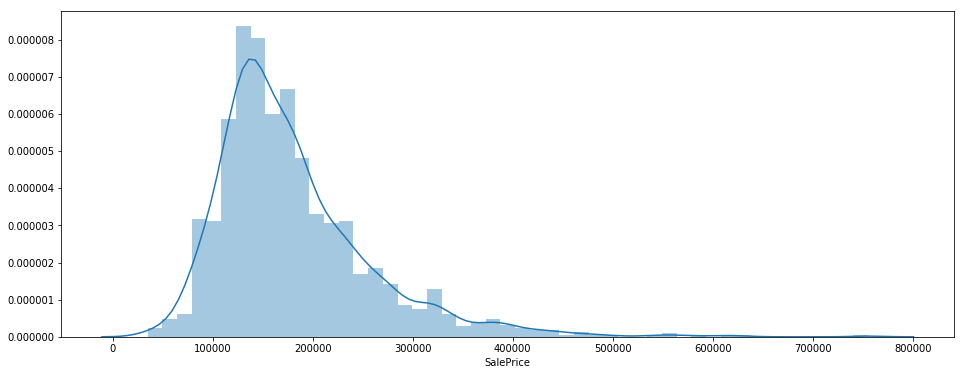

In [86]:
plt.figure(figsize=(16,6))
sns.distplot(Housing_dataset.SalePrice)
plt.show()

# Spliting the dataset into train (70%) and test (30%) dataset .

In [87]:
house_train, house_test = train_test_split(Housing_dataset, train_size =0.7 ,test_size = 0.3,random_state= 100)
print(house_train.shape)
print(house_test.shape)

(1007, 166)
(432, 166)


# Performing StandardScaling on numeric features of the dataset..

In [88]:
scaler = StandardScaler()
num_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
            'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF', 'GrLivArea','BsmtHalfBath',
            'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageCars','GarageArea',
            'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch', 'MiscVal','MoSold']

In [89]:
house_train[num_vars] = scaler.fit_transform(house_train[num_vars])
house_train[num_vars]

/Users/z003zyj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/z003zyj/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/z003zyj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/z003zyj/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a c

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold
426,0.028106,0.514564,0.679301,-0.516551,0.235155,2.497832,-0.286791,-1.294099,1.166464,1.363099,...,0.633309,0.337104,0.483708,-0.080776,-0.688484,-0.374431,-0.123564,6.962330,-0.165986,0.648246
1445,0.025611,-0.275292,-0.060219,-0.516551,-0.549571,-0.581780,3.857413,-1.294099,-0.592318,-0.661224,...,-0.941363,-1.009974,-1.084166,-0.751635,-0.688484,3.750646,-0.123564,-0.266891,-0.165986,-0.474662
390,-0.973211,-0.274395,-0.799739,2.155540,-0.549571,-0.456838,2.297553,-0.773511,-0.474900,-0.528300,...,-0.941363,-1.009974,-0.397923,-0.751635,1.210058,1.458937,-0.123564,-0.266891,-0.165986,-0.848964
869,0.525022,0.000798,0.679301,-0.516551,0.781757,0.720866,-0.286791,-0.612106,-0.002727,-0.248606,...,0.633309,0.337104,0.507536,0.556540,0.625891,-0.374431,-0.123564,-0.266891,-0.165986,-0.100359
990,0.624904,-0.086445,1.418820,-0.516551,1.739663,1.470523,-0.286791,-0.562093,0.861675,0.706786,...,0.633309,1.684182,1.918147,-0.751635,0.333808,-0.374431,-0.123564,-0.266891,-0.165986,-0.100359
598,0.525022,0.547594,-0.799739,0.374146,1.934491,1.954099,0.684816,-1.294099,0.946616,1.371407,...,0.633309,0.337104,0.731518,-0.751635,-0.688484,-0.374431,-0.123564,-0.266891,-0.165986,-1.223266
125,-0.473800,-0.566103,-0.060219,2.155540,-0.549571,0.119288,-0.286791,-1.225900,-1.326810,-1.749540,...,-0.941363,-2.357052,-2.227905,-0.307191,-0.688484,-0.374431,-0.123564,-0.266891,-0.165986,-0.100359
691,1.723608,2.082609,2.897860,0.374146,5.782352,2.352065,-0.286791,0.954206,3.479862,3.578501,...,2.207981,1.684182,1.737055,2.451716,0.041724,-0.374431,-0.123564,-0.266891,-0.165986,-1.971871
1314,-0.473800,-0.312990,-1.539259,0.374146,-0.549571,0.679218,-0.286791,-0.803064,-0.257550,-0.564300,...,0.633309,-1.009974,-0.893543,-0.751635,-0.162734,-0.374431,-0.123564,-0.266891,-0.165986,1.396850
147,0.028106,-0.076931,0.679301,-0.516551,0.424571,-1.014453,-0.286791,0.715509,-0.417439,-0.741533,...,0.633309,0.337104,-0.159644,0.455911,0.012516,-0.374431,-0.123564,-0.266891,-0.165986,-0.474662


In [90]:
house_test[num_vars] = scaler.transform(house_test[num_vars])
house_test[num_vars]

/Users/z003zyj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/Users/z003zyj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/z003zyj/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold
57,0.974492,0.307227,0.679301,-0.516551,-0.549571,-1.014453,-0.286791,0.660949,-0.477398,-0.807995,...,-0.941363,0.337104,0.464646,-0.751635,0.333808,-0.374431,-0.123564,-0.266891,-0.165986,0.648246
614,-2.421503,-1.515547,-1.539259,0.374146,-0.549571,-0.667390,2.885805,-1.294099,-1.052000,-1.444923,...,-0.941363,-2.357052,-2.227905,0.053396,-0.337984,-0.374431,-0.123564,-0.266891,-0.165986,-0.474662
367,1.573785,-0.140658,-0.060219,-0.516551,1.101059,-0.156049,-0.286791,0.360872,0.119689,0.773248,...,0.633309,-1.009974,-0.817294,-0.214948,0.917974,-0.374431,-0.123564,-0.266891,-0.165986,2.145455
957,0.025611,-0.451215,-0.799739,-0.516551,-0.549571,-0.049616,-0.286791,0.160820,0.014761,-0.262452,...,-0.941363,0.337104,0.517067,-0.751635,-0.688484,-0.374431,-0.123564,-0.266891,-0.165986,-0.848964
679,0.028106,0.002055,-0.799739,-0.516551,-0.241092,0.899025,-0.286791,-0.928096,-0.157619,-0.453530,...,-0.941363,0.337104,0.498005,-0.751635,-0.688484,-0.374431,-0.123564,-0.266891,-0.165986,1.396850
915,-2.421503,-1.423995,-1.539259,-0.516551,-0.116619,-1.014453,-0.286791,-0.052871,-1.261855,-1.677540,...,-0.941363,-1.009974,-0.864950,-0.751635,-0.688484,-0.374431,-0.123564,-0.266891,-0.165986,-1.971871
1375,0.974492,0.189825,1.418820,-0.516551,-0.116619,-1.014453,-0.286791,2.277274,1.298872,1.160944,...,0.633309,1.684182,1.212842,0.086939,-0.162734,-0.374431,-0.123564,-0.266891,-0.165986,2.145455
1073,0.275316,-0.356073,-0.060219,0.374146,0.208095,0.223408,-0.286791,-0.941736,-0.902104,-1.256614,...,-0.941363,0.337104,-0.131051,1.361570,-0.688484,-0.374431,-0.123564,-0.266891,-0.165986,0.273943
780,-0.323977,-0.369537,0.679301,-0.516551,-0.343919,-1.014453,-0.286791,1.517988,0.464450,0.280321,...,0.633309,0.337104,-0.312143,1.093227,-0.381797,-0.374431,-0.123564,-0.266891,-0.165986,-0.100359
974,-0.473800,0.265759,0.679301,2.155540,-0.549571,-1.014453,-0.286791,0.360872,-0.807170,-0.043681,...,-0.941363,0.337104,0.307382,3.516704,1.283079,-0.374431,-0.123564,-0.266891,-0.165986,1.396850


#  Checking the distribution of our target variable After scaling and Splitting

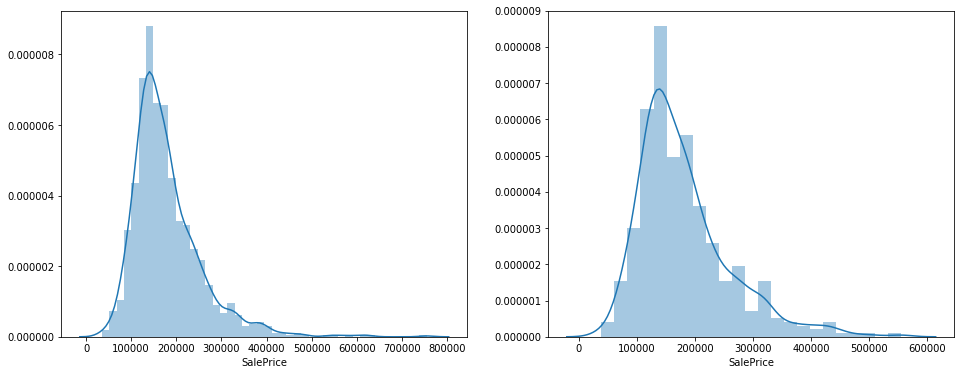

In [91]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(house_train.SalePrice)
plt.subplot(122)
sns.distplot(house_test.SalePrice)

# populating X_train,y_train,X_test and y_test for model creation..

In [92]:
y_train = house_train.pop('SalePrice')
y_train

X_train = house_train
X_train

,LotFrontage,LotArea,LandContour,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,Exterior2nd__HdBoard,Exterior2nd__ImStucc,Exterior2nd__MetalSd,Exterior2nd__Other,Exterior2nd__Plywood,Exterior2nd__Stone,Exterior2nd__Stucco,Exterior2nd__VinylSd,Exterior2nd__Wd Sdng,Exterior2nd__Wd Shng
426,0.028106,0.514564,3,0,0.679301,-0.516551,0.235155,3,1,3,...,0,0,0,0,0,0,0,0,1,0
1445,0.025611,-0.275292,1,1,-0.060219,-0.516551,-0.549571,1,1,1,...,0,0,0,0,0,0,0,1,0,0
390,-0.973211,-0.274395,1,1,-0.799739,2.155540,-0.549571,1,1,1,...,0,0,1,0,0,0,0,0,0,0
869,0.525022,0.000798,1,1,0.679301,-0.516551,0.781757,3,1,3,...,0,0,1,0,0,0,0,0,0,0
990,0.624904,-0.086445,1,1,1.418820,-0.516551,1.739663,3,1,3,...,0,0,0,0,0,0,0,1,0,0
598,0.525022,0.547594,0,1,-0.799739,0.374146,1.934491,1,1,3,...,0,0,0,0,1,0,0,0,0,0
125,-0.473800,-0.566103,1,1,-0.060219,2.155540,-0.549571,1,2,1,...,0,0,0,0,0,0,0,0,1,0
691,1.723608,2.082609,1,1,2.897860,0.374146,5.782352,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1314,-0.473800,-0.312990,1,1,-1.539259,0.374146,-0.549571,1,1,1,...,0,0,0,0,0,0,0,0,1,0
147,0.028106,-0.076931,1,1,0.679301,-0.516551,0.424571,3,1,3,...,0,0,0,0,0,0,0,1,0,0


In [93]:
y_test = house_test.pop('SalePrice')
y_test

X_test = house_test
X_test

,LotFrontage,LotArea,LandContour,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,Exterior2nd__HdBoard,Exterior2nd__ImStucc,Exterior2nd__MetalSd,Exterior2nd__Other,Exterior2nd__Plywood,Exterior2nd__Stone,Exterior2nd__Stucco,Exterior2nd__VinylSd,Exterior2nd__Wd Sdng,Exterior2nd__Wd Shng
57,0.974492,0.307227,1,1,0.679301,-0.516551,-0.549571,3,1,3,...,0,0,0,0,0,0,0,1,0,0
614,-2.421503,-1.515547,1,1,-1.539259,0.374146,-0.549571,1,1,3,...,0,0,0,0,0,0,0,0,0,0
367,1.573785,-0.140658,1,1,-0.060219,-0.516551,1.101059,1,1,3,...,0,0,0,0,1,0,0,0,0,0
957,0.025611,-0.451215,1,1,-0.799739,-0.516551,-0.549571,1,1,1,...,0,0,1,0,0,0,0,0,0,0
679,0.028106,0.002055,1,1,-0.799739,-0.516551,-0.241092,1,1,1,...,0,0,0,0,0,0,0,0,1,0
915,-2.421503,-1.423995,1,1,-1.539259,-0.516551,-0.116619,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1375,0.974492,0.189825,2,1,1.418820,-0.516551,-0.116619,3,1,3,...,0,0,0,0,0,0,0,1,0,0
1073,0.275316,-0.356073,0,1,-0.060219,0.374146,0.208095,1,1,1,...,0,0,0,0,1,0,0,0,0,0
780,-0.323977,-0.369537,1,1,0.679301,-0.516551,-0.343919,1,1,3,...,1,0,0,0,0,0,0,0,0,0
974,-0.473800,0.265759,1,1,0.679301,2.155540,-0.549571,1,3,3,...,1,0,0,0,0,0,0,0,0,0


In [94]:
print(len(X_train.columns))
print(len(X_test.columns))

165
165


In [95]:
X_train.head(10)

,LotFrontage,LotArea,LandContour,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,Exterior2nd__HdBoard,Exterior2nd__ImStucc,Exterior2nd__MetalSd,Exterior2nd__Other,Exterior2nd__Plywood,Exterior2nd__Stone,Exterior2nd__Stucco,Exterior2nd__VinylSd,Exterior2nd__Wd Sdng,Exterior2nd__Wd Shng
426,0.028106,0.514564,3,0,0.679301,-0.516551,0.235155,3,1,3,...,0,0,0,0,0,0,0,0,1,0
1445,0.025611,-0.275292,1,1,-0.060219,-0.516551,-0.549571,1,1,1,...,0,0,0,0,0,0,0,1,0,0
390,-0.973211,-0.274395,1,1,-0.799739,2.155540,-0.549571,1,1,1,...,0,0,1,0,0,0,0,0,0,0
869,0.525022,0.000798,1,1,0.679301,-0.516551,0.781757,3,1,3,...,0,0,1,0,0,0,0,0,0,0
990,0.624904,-0.086445,1,1,1.418820,-0.516551,1.739663,3,1,3,...,0,0,0,0,0,0,0,1,0,0
598,0.525022,0.547594,0,1,-0.799739,0.374146,1.934491,1,1,3,...,0,0,0,0,1,0,0,0,0,0
125,-0.473800,-0.566103,1,1,-0.060219,2.155540,-0.549571,1,2,1,...,0,0,0,0,0,0,0,0,1,0
691,1.723608,2.082609,1,1,2.897860,0.374146,5.782352,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1314,-0.473800,-0.312990,1,1,-1.539259,0.374146,-0.549571,1,1,1,...,0,0,0,0,0,0,0,0,1,0
147,0.028106,-0.076931,1,1,0.679301,-0.516551,0.424571,3,1,3,...,0,0,0,0,0,0,0,1,0,0


# Model Building using  Ridge Regression ..

In [96]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,100,200,400,500,1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.9s finished
/Users/z003zyj/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200, 400, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [97]:
# Considering 'Param_alpha' as int32 and where it is less than 200 for Ridge Regression.

cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r = cv_result_r[cv_result_r['param_alpha']<=200]
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('int32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005767,0.003685,0.001142,0.000093,0,{'alpha': 0.0001},-20044.203366,-19416.646440,-21884.220842,-20332.064695,...,-21180.085260,1729.515487,29,-16192.510958,-16303.136434,-15272.650971,-16159.664425,-14898.221065,-15765.236771,569.531291
1,0.003980,0.000264,0.001106,0.000081,0,{'alpha': 0.001},-20042.122243,-19403.341466,-21882.074172,-20328.390027,...,-21174.969495,1731.166896,28,-16192.504546,-16303.797137,-15272.880386,-16159.984724,-14898.569537,-15765.547266,569.553753
2,0.003577,0.000238,0.001054,0.000145,0,{'alpha': 0.01},-20022.375834,-19285.977020,-21861.394330,-20292.149630,...,-21128.117610,1745.910310,27,-16192.656509,-16310.051329,-15276.054158,-16163.268310,-14901.526185,-15768.711298,569.767476
3,0.004028,0.000505,0.001261,0.000237,0,{'alpha': 0.05},-19950.053813,-18943.370808,-21783.627884,-20142.510726,...,-20970.735336,1787.177817,26,-16193.663157,-16334.111945,-15287.991695,-16185.555671,-14914.469131,-15783.158320,571.629012
4,0.003265,0.000329,0.001101,0.000153,0,{'alpha': 0.1},-19878.450139,-18689.345525,-21706.020525,-19980.602594,...,-20827.524861,1810.386029,25,-16197.733137,-16354.811981,-15299.433927,-16213.222559,-14930.581787,-15799.156678,573.273361


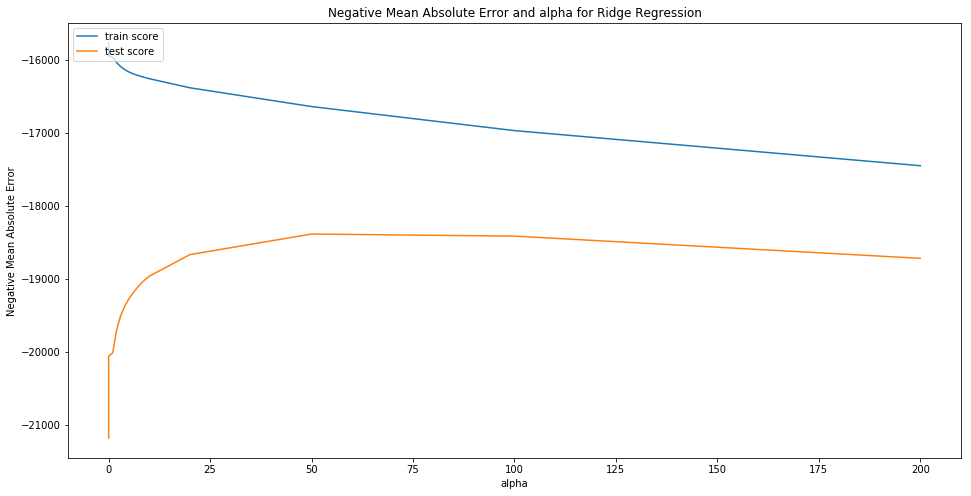

In [98]:
# plotting the graph for Ridge Regression..

plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'], cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'], cv_result_r['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha for Ridge Regression")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

# Model Evaluation for Ridge Regression Model..

In [99]:
# finding the best Param / alpha 
model_cv.best_params_

{'alpha': 50}

In [100]:
# Finding the accuracy of the model on train and test data given best alpha value.

ridge = Ridge(alpha = 50)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8790610614507977
0.8886621360657327


In [101]:
# Finding the list of features with Co-efficient values.
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = house_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [102]:
# Finding Top 5 most important Predictor Variable/Feature  after building the Ridge Model ..(Positive Correlation)
ridge_coef.sort_values(by='Coef',ascending=False).head(5)

,Feaure,Coef
0,LotFrontage,206539.891686
5,OverallCond,16305.538185
21,BsmtHalfBath,12026.666023
19,LowQualFinSF,9491.572268
51,BsmtExposure__Mn,8635.734874


In [103]:
# Finding Top 5 most important Predictor Variable/Feature  after building the Ridge Model ..(Negative Correlation)
ridge_coef.sort_values(by='Coef',ascending=True).head(5)

,Feaure,Coef
10,BsmtCond,-6216.882515
83,Foundation__PConc,-5689.511186
132,Condition1__RRAe,-5598.948485
53,LotShape__IR2,-4998.585165
26,KitchenQual,-4800.442076


# Model Building using  Lasso Regression ..

In [104]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,100,200,400,500,1000]}


lasso = Lasso()
# cross validation
folds = 5
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/z003zyj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/z003zyj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/z003zyj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/z003zyj/anaconda3/lib/python3.7/site-packages

/Users/z003zyj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/z003zyj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/z003zyj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/z003zyj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective di

/Users/z003zyj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/z003zyj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/z003zyj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/z003zyj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective di

/Users/z003zyj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/z003zyj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/z003zyj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/z003zyj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective di

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200, 400, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [105]:
# Considering 'Param_alpha' as float32
cv_result_l = pd.DataFrame(model_cv_lasso.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.068773,0.009171,0.001181,0.000081,0.0001,{'alpha': 0.0001},-20083.842810,-19380.297415,-21885.232767,-20332.692115,...,-21173.381329,1718.355696,28,-16192.142974,-16304.297834,-15272.765175,-16159.164660,-14902.523090,-15766.178747,568.298100
1,0.066305,0.007134,0.001287,0.000109,0.0010,{'alpha': 0.001},-20083.543440,-19380.158814,-21885.178027,-20332.619851,...,-21173.550294,1718.922201,29,-16192.138935,-16304.304059,-15272.774965,-16159.166143,-14902.528129,-15766.182446,568.295646
2,0.066475,0.003739,0.001165,0.000116,0.0100,{'alpha': 0.01},-20080.576986,-19378.764324,-21884.630593,-20331.896922,...,-21175.287963,1724.666026,30,-16192.168041,-16304.371821,-15272.890217,-16159.238560,-14902.614241,-15766.256576,568.276672
3,0.065146,0.002885,0.001413,0.000119,0.0500,{'alpha': 0.05},-20068.819738,-19371.463904,-21882.203297,-20328.683770,...,-21171.292557,1729.485091,27,-16192.300587,-16304.801411,-15273.410129,-16159.571135,-14903.065946,-15766.629842,568.196334
4,0.074575,0.006546,0.001346,0.000109,0.1000,{'alpha': 0.1},-20064.405623,-19361.049981,-21879.165518,-20324.666546,...,-21165.925357,1730.631072,26,-16192.488503,-16305.308592,-15274.118221,-16160.007157,-14903.633359,-15767.111166,568.085482


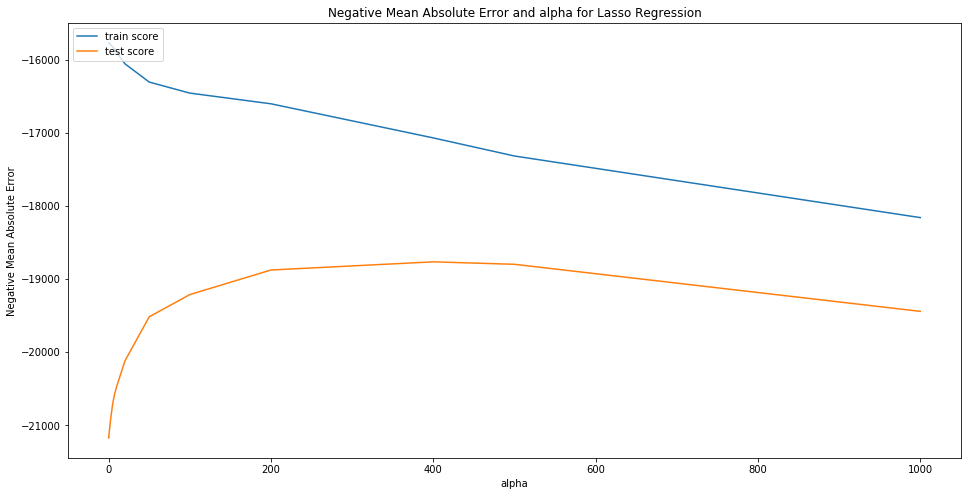

In [106]:
# plotting the graph for Lasso Regression
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'], cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'], cv_result_l['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha for Lasso Regression")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

# Model Evaluation for Lasso Regression Model..

In [107]:
# finding the best Param / alpha 
model_cv_lasso.best_params_

{'alpha': 400}

In [108]:
# Finding the accuracy of the model on train and test data given best alpha value.

lasso = Lasso(alpha=400)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8713342998183783
0.8855745851017353


In [109]:
# Finding the list of features with Co-efficient values.

model_parameter = list(lasso.coef_)
model_parameter.insert(0,lasso.intercept_)
cols = house_train.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef.columns = ['Feaure','Coef']

In [110]:
# Finding Top 5 most important Predictor Variable/Feature  after building the Lasso Model ..(Positive Correlation)

lasso_coef.sort_values(by='Coef',ascending=False).head(5)

,Feaure,Coef
0,LotFrontage,213400.501724
21,BsmtHalfBath,23012.938418
5,OverallCond,18078.840303
51,BsmtExposure__Mn,10780.879182
126,SaleType__Oth,10641.706412


In [111]:
# Finding Top 5 most important Predictor Variable/Feature  after building the Lasso Model ..(Negative Correlation)

lasso_coef.sort_values(by='Coef',ascending=True).head(5)

,Feaure,Coef
83,Foundation__PConc,-9013.461496
10,BsmtCond,-6293.411708
72,GarageType__Attchd,-5497.405474
48,MasVnrType__None,-5490.426787
26,KitchenQual,-4304.779090
